# Importing Libraries and loading the Dataset

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import sklearn.metrics
from tqdm import tqdm

In [4]:
data=pd.read_csv("4910797b-ee55-40a7-8668-10efd5c1b960.csv")
data

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [5]:
data_result=pd.read_csv("0bf8bc6e-30d0-4c50-956a-603fc693d966.csv")
data_result

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [6]:
data=pd.merge(data,data_result,on="id")
del data_result

In [7]:
data

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [8]:
test=pd.read_csv("702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv")

## Splitting data

In [9]:
# Spilling data into train and validation
import sklearn.model_selection

train,validation=sklearn.model_selection.train_test_split(data)
train=train.reset_index()
validation=validation.reset_index()

# Exploratory Data Analysis

In [10]:
train.columns

Index(['index', 'id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [12]:
train["payment_type"]

0         never pay
1           unknown
2           monthly
3        on failure
4             other
            ...    
44545    per bucket
44546     never pay
44547    on failure
44548       unknown
44549       unknown
Name: payment_type, Length: 44550, dtype: object

- Not a feature: ID, Date_recorded,region_code,district_code,recorded_by,construction_year
- Numerical: Amount_tsh, gps_height,longitude,latitude,num_private,population
- Categorical: Funder,installer,wpt_name,basin,subvillage,region,lga,ward,scheme_management,scheme_name,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
- Binary Categorical: public_meeting,permit

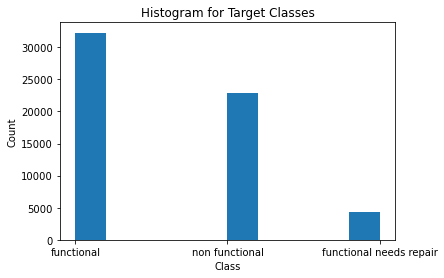

In [14]:
plt.hist(data["status_group"])
plt.title("Histogram for Target Classes")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

- Dataset is imbalanced

# Exploratory Data Analysis
# Numerical Features:

In [10]:
#standardizing function for numerical features
def process_lin(feature_name,train,validation,test):
    sc=StandardScaler()
    x1=sc.fit_transform(np.array(train[feature_name]).reshape(-1, 1))
    x2=sc.transform(np.array(validation[feature_name]).reshape(-1, 1))
    x3=sc.transform(np.array(test[feature_name]).reshape(-1, 1))
    return x1,x2,x3

feature_names=[]

## Amount of Total Static Head

In [11]:
np.sort(train["amount_tsh"].unique())

array([0.00e+00, 2.00e-01, 2.50e-01, 1.00e+00, 2.00e+00, 5.00e+00,
       6.00e+00, 7.00e+00, 9.00e+00, 1.00e+01, 1.20e+01, 1.50e+01,
       2.00e+01, 2.50e+01, 2.60e+01, 3.00e+01, 3.30e+01, 3.50e+01,
       4.00e+01, 5.00e+01, 5.30e+01, 5.90e+01, 6.00e+01, 7.00e+01,
       1.00e+02, 1.50e+02, 2.00e+02, 2.20e+02, 2.50e+02, 3.00e+02,
       3.50e+02, 4.00e+02, 4.50e+02, 5.00e+02, 5.20e+02, 5.50e+02,
       5.90e+02, 6.00e+02, 7.00e+02, 7.50e+02, 8.00e+02, 9.00e+02,
       1.00e+03, 1.20e+03, 1.30e+03, 1.40e+03, 1.50e+03, 2.00e+03,
       2.20e+03, 2.40e+03, 2.50e+03, 2.80e+03, 3.00e+03, 3.50e+03,
       3.60e+03, 4.00e+03, 4.50e+03, 4.70e+03, 5.00e+03, 5.40e+03,
       5.50e+03, 6.00e+03, 6.30e+03, 6.50e+03, 7.00e+03, 7.20e+03,
       7.50e+03, 8.00e+03, 8.50e+03, 9.00e+03, 1.00e+04, 1.10e+04,
       1.20e+04, 1.30e+04, 1.40e+04, 1.50e+04, 1.60e+04, 1.63e+04,
       1.80e+04, 2.00e+04, 2.50e+04, 2.60e+04, 3.00e+04, 3.80e+04,
       4.00e+04, 4.50e+04, 5.00e+04, 6.00e+04, 7.00e+04, 1.00e

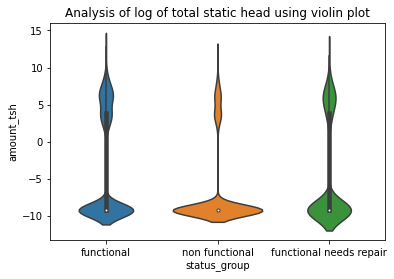

In [12]:
sns.violinplot(x=train["status_group"], y=np.log(0.0001+train["amount_tsh"]), size=8)
plt.title("Analysis of log of total static head using violin plot")
plt.show()

#### - Distributions are similiar while most of the total_static_head values are around 0.

In [13]:
processed_train,processed_validation,processed_test=process_lin("amount_tsh",train,validation,test)
processed_train.shape,processed_validation.shape,processed_test.shape

((44550, 1), (14850, 1), (14850, 1))

In [14]:
feature_names.extend(["total static head"])

## Age of well

In [90]:
train["date_recorded"]

0        2011-03-27
1        2011-07-12
2        2011-08-07
3        2013-02-03
4        2013-02-18
            ...    
44545    2013-02-06
44546    2013-03-27
44547    2011-03-18
44548    2012-10-07
44549    2013-03-19
Name: date_recorded, Length: 44550, dtype: object

In [91]:
train["construction_year"]

0           0
1           0
2           0
3        2004
4        2008
         ... 
44545    2006
44546    1978
44547    1978
44548       0
44549    2009
Name: construction_year, Length: 44550, dtype: int64

#### - Distribution of age(Construction year to date of recording data) for "Functional" well seem to be concentrated around much lesser value as compared to "Non-functional" and "functional needs repair".
#### - Distributions for "Non-functional" and "functional needs repair" are almost similiar however the later seems relatively concentrated around lower values too

In [92]:
def process_age(dataset):
    age=np.zeros(len(dataset["date_recorded"]))
    
    for i,j in enumerate(dataset["date_recorded"]):
        if dataset["construction_year"][i]!=0 and int(j[:4])>=dataset["construction_year"][i]:
            age[i]=(365*(int(j[:4])-dataset["construction_year"][i]))+(30*int(j[-5:-3]))+int(j[-2:])
        else:
            age[i]=np.nan
    return age

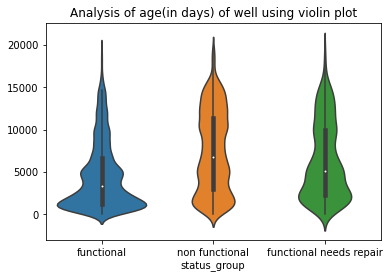

In [93]:
age=process_age(train)
sns.violinplot(x=train["status_group"], y=age, size=8)
plt.title("Analysis of age(in days) of well using violin plot")
plt.show()

In [94]:
x1=process_age(train)
x2=process_age(validation)
x3=process_age(test)

processed_train=np.column_stack([processed_train,x1])
processed_validation=np.column_stack([processed_validation,x2])
processed_test=np.column_stack([processed_test,x3])

In [95]:
processed_train.shape,processed_validation.shape,processed_test.shape

((44550, 2), (14850, 2), (14850, 2))

In [96]:
feature_names.extend(["Age"])

## GPS Height

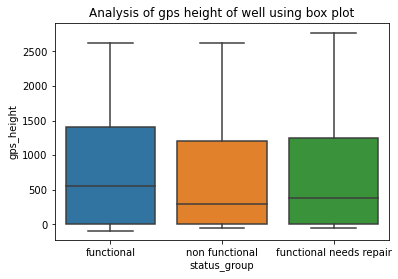

In [17]:
sns.boxplot(x="status_group", y="gps_height", data=data)
plt.title("Analysis of gps height of well using box plot")
plt.show()

- Distributions of non-functional and functional_needs_repair are almost similar

In [98]:
x1,x2,x3=process_lin("gps_height",train,validation,test)
processed_train=np.column_stack([processed_train,x1])
processed_validation=np.column_stack([processed_validation,x2])
processed_test=np.column_stack([processed_test,x3])

processed_train.shape,processed_validation.shape,processed_test.shape

((44550, 3), (14850, 3), (14850, 3))

In [99]:
feature_names.extend(["GPS Height"])

# Population

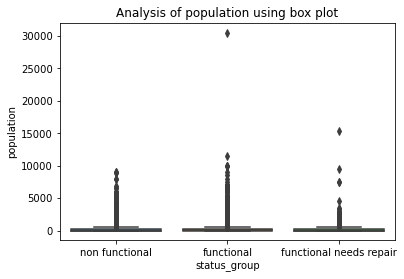

In [18]:
sns.boxplot(x="status_group", y="population", data=train)
plt.title("Analysis of population using box plot")
plt.show()

In [101]:
z=np.sort(train["population"])
for i in [10,25,50,75,90,95,99,99.99]:
        print(i," percentile of datapoints have population less than or equal to",z[int(len(z)*i/100)])

10  percentile of datapoints have population less than or equal to 0
25  percentile of datapoints have population less than or equal to 0
50  percentile of datapoints have population less than or equal to 25
75  percentile of datapoints have population less than or equal to 215
90  percentile of datapoints have population less than or equal to 458
95  percentile of datapoints have population less than or equal to 680
99  percentile of datapoints have population less than or equal to 2000
99.99  percentile of datapoints have population less than or equal to 9865


In [102]:
x1,x2,x3=process_lin("population",train,validation,test)
processed_train=np.column_stack([processed_train,x1])
processed_validation=np.column_stack([processed_validation,x2])
processed_test=np.column_stack([processed_test,x3])

processed_train.shape,processed_validation.shape,processed_test.shape

((44550, 4), (14850, 4), (14850, 4))

In [103]:
feature_names.extend(["population"])

# T-SNE

In [104]:
from sklearn.manifold import TSNE
tsne=TSNE()

In [105]:
def dropna(arr, *args, **kwarg):
    assert isinstance(arr, np.ndarray)
    dropped=pd.DataFrame(arr).dropna(*args, **kwarg).values
    if arr.ndim==1:
        dropped=dropped.flatten()
    return dropped

In [106]:
z["status_group"]=train["status_group"]
x=dropna(np.array(z.drop(["status_group"],axis=1)))

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
res=enc.fit_transform(z["status_group"])
x=tsne.fit_transform(x,y=res)

28967it [24:27, 19.73it/s]


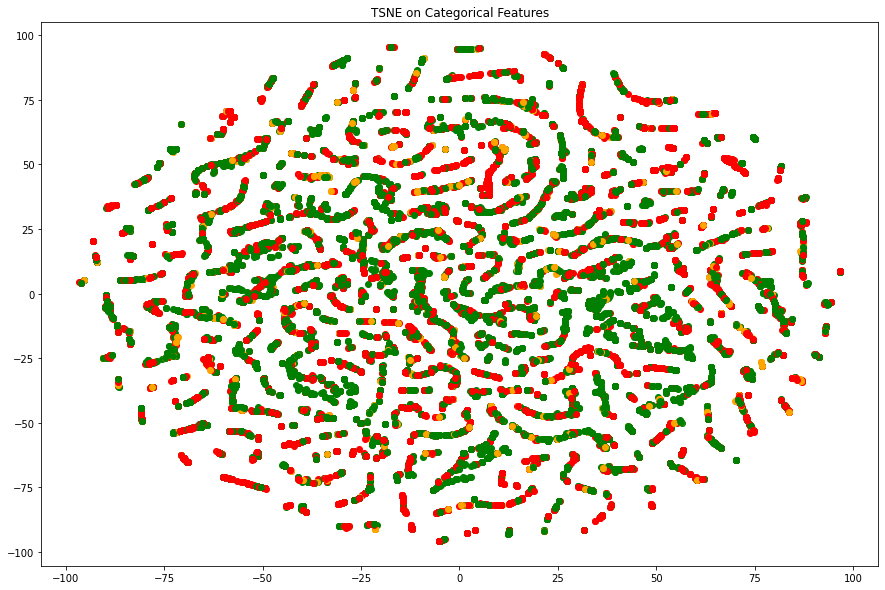

In [133]:
plt.figure(figsize=(15,10))
for j,i in tqdm(enumerate(res)):
    if i==0:
        plt.scatter([x[j][0]],[x[j][1]],color="Green")
    elif i==1:
        plt.scatter([x[j][0]],[x[j][1]],color="Orange")
    else:
        plt.scatter([x[j][0]],[x[j][1]],color="Red")
plt.title("TSNE on Numerical Features")
plt.show()

## PCA

In [116]:
z=pd.DataFrame(processed_train)
z["status_group"]=train["status_group"]
x=dropna(np.array(z.drop(["status_group"],axis=1)))

In [117]:
from sklearn.decomposition import PCA
pca=PCA()
z=pca.fit_transform(x)

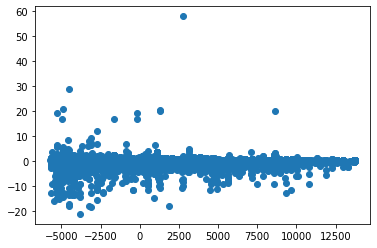

In [119]:
plt.scatter([i[0] for i in z],[i[1] for i in z])

## Correlation amongst numerical features

Correlation matrix is : 
                   total static head       Age  GPS Height  population
total static head           1.000000 -0.008146    0.070782    0.018460
Age                        -0.008146  1.000000    0.022936   -0.027868
GPS Height                  0.070782  0.022936    1.000000    0.147603
population                  0.018460 -0.027868    0.147603    1.000000


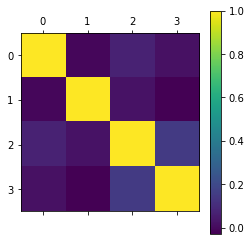

In [29]:
dataframe = pd.DataFrame(processed_train)

matrix = dataframe.corr()
print("Correlation matrix is : ")
m=pd.DataFrame(matrix)
m.columns=feature_names
m.index=feature_names
print(m)

plt.matshow(matrix)
plt.colorbar()
plt.show()

# Categorical Features

## Defining function to analyze categorical features

In [15]:
def analyze_categorical(column_name):
    funder_occurance={}
    for i in train[column_name]:
        if i in funder_occurance:
            funder_occurance[i]=funder_occurance[i]+1
        else:
            funder_occurance[i]=1
    print("There exist a total of",len(funder_occurance),"unique values of '",column_name,"'\n")
    x=list(funder_occurance.values())
    y=list(funder_occurance.keys())
    z=np.sort(x)
    print("Out of these",len(z),"unique values/categories,",)
    for i in [50,75,95]:
        print("    ",i,"percentile or",int(len(z)*i/100),"values/categories occur less than or equal to"\
              ,z[int(len(z)*i/100)]," times in the whole dataset." )
    
    print("\nThe most common value/categories are:")
    value=[]
    occurance=[]
    
    for i in range(10):
        maxx=np.argmax(x)
        if i<3:
            print(i+1,") ",y[maxx],"with ",x[maxx],"occurances.")
        value.append(str(y[maxx]))
        occurance.append(x[maxx])
        x[maxx]=0

    plt.figure(figsize=(15,5))
    plt.ylabel("Occurances")
    plt.xlabel("Value/Category")
    plt.bar(value,occurance)
    plt.title("Bar Plot for unique "+str(column_name)+" values and respective frequency")
    plt.grid()
    plt.show()
    print("\nPie Charts for most occuring categories and their status_group\n")
    plt.figure(figsize=(15,5))
    for j,i in enumerate(value[:3]):
        if i=="nan":
            continue
        x=train[train[column_name]==i]
        x1=len(x[x["status_group"]=="functional"])
        x2=len(x[x["status_group"]=="non functional"])
        x3=len(x[x["status_group"]=="functional needs repair"])
        plt.subplot(1,3,j+1)
        plt.title(i)
        plt.pie([x1,x2,x3],labels=["functional","non functional","func. needs rep."],explode=[0.05,0.05,0.05])
    plt.show()

#### Function to process categorical features

In [31]:
#takes train validation and test dataset with the minimum frequency of features for one-hot encoding
def process_categorical(feature_name,train,validation,test,unique_count_cutoff):
    enc=OneHotEncoder(min_frequency=unique_count_cutoff,handle_unknown = 'ignore')
    x1=enc.fit_transform(np.array(train[feature_name]).reshape(-1, 1))
    x2=enc.transform(np.array(validation[feature_name]).reshape(-1, 1))
    x3=enc.transform(np.array(test[feature_name]).reshape(-1, 1))
    
    return x1.toarray(),x2.toarray(),x3.toarray(),[feature_name+" "+str(i) for i in range(x1.shape[1])]

## Funder

There exist a total of 1647 unique values of ' funder '

Out of these 1647 unique values/categories,
     50 percentile or 823 values/categories occur less than or equal to 1  times in the whole dataset.
     75 percentile or 1235 values/categories occur less than or equal to 7  times in the whole dataset.
     95 percentile or 1564 values/categories occur less than or equal to 85  times in the whole dataset.

The most common value/categories are:
1 )  Government Of Tanzania with  6787 occurances.
2 )  nan with  2674 occurances.
3 )  Danida with  2359 occurances.


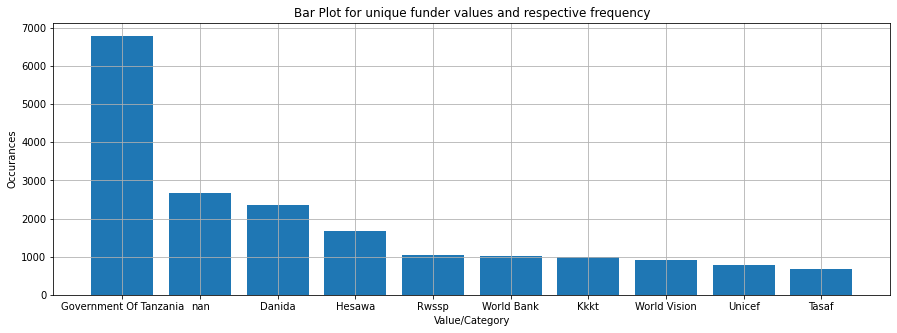


Pie Charts for most occuring categories and their status_group



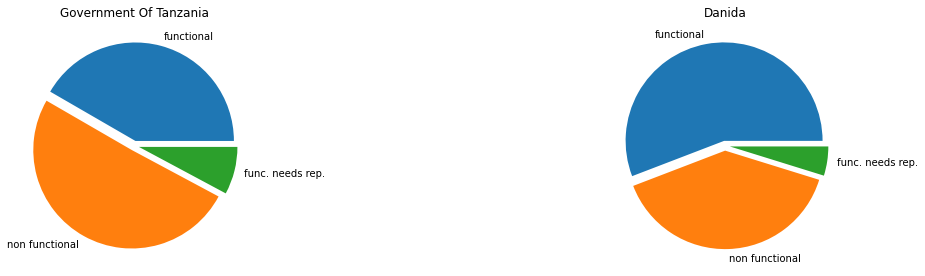

In [32]:
analyze_categorical("funder")

- Can introduce a threshold frequency of 50

In [33]:
x1,x2,x3,z=process_categorical("funder",train,validation,test,50)

feature_names.extend(z)
processed_train=np.column_stack([processed_train,x1])
processed_validation=np.column_stack([processed_validation,x2])
processed_test=np.column_stack([processed_test,x3])

processed_train.shape,processed_validation.shape,processed_test.shape

((44550, 122), (14850, 122), (14850, 122))

## Installer

There exist a total of 1875 unique values of ' installer '

Out of these 1875 unique values/categories,
     50 percentile or 937 values/categories occur less than or equal to 2  times in the whole dataset.
     75 percentile or 1406 values/categories occur less than or equal to 6  times in the whole dataset.
     95 percentile or 1781 values/categories occur less than or equal to 68  times in the whole dataset.

The most common value/categories are:
1 )  DWE with  13062 occurances.
2 )  nan with  2688 occurances.
3 )  Government with  1348 occurances.


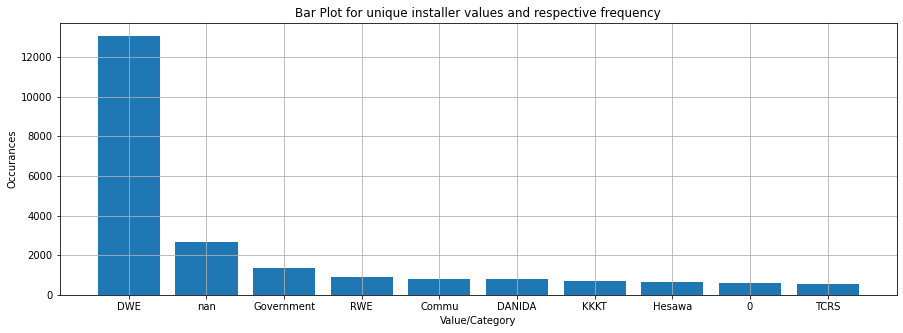


Pie Charts for most occuring categories and their status_group



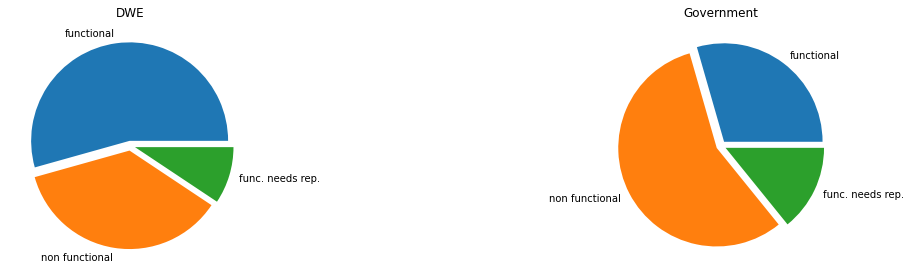

In [34]:
analyze_categorical("installer")

- Threshold Frequency of 5

In [35]:
x1,x2,x3,z=process_categorical("installer",train,validation,test,5)

feature_names.extend(z)
processed_train=np.column_stack([processed_train,x1])
processed_validation=np.column_stack([processed_validation,x2])
processed_test=np.column_stack([processed_test,x3])

processed_train.shape,processed_validation.shape,processed_test.shape

((44550, 655), (14850, 655), (14850, 655))

# Basin

There exist a total of 9 unique values of ' basin '

Out of these 9 unique values/categories,
     50 percentile or 4 values/categories occur less than or equal to 4779  times in the whole dataset.
     75 percentile or 6 values/categories occur less than or equal to 5989  times in the whole dataset.
     95 percentile or 8 values/categories occur less than or equal to 7765  times in the whole dataset.

The most common value/categories are:
1 )  Lake Victoria with  7765 occurances.
2 )  Pangani with  6695 occurances.
3 )  Rufiji with  5989 occurances.


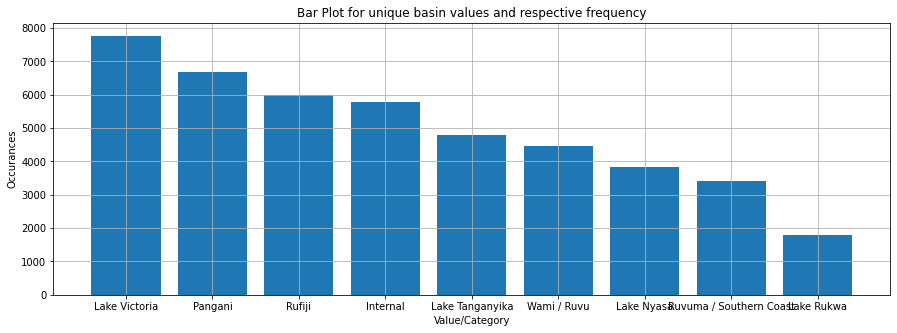


Pie Charts for most occuring categories and their status_group



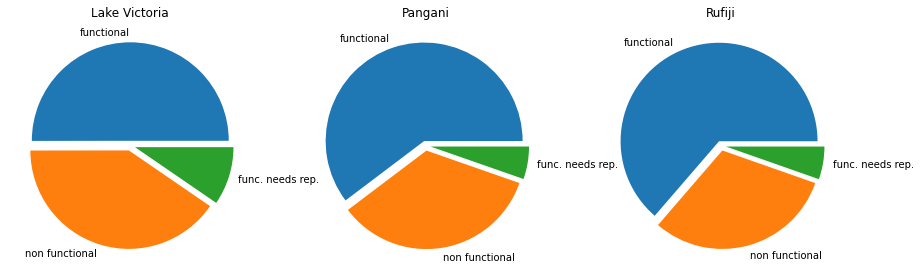

In [36]:
analyze_categorical("basin")

In [37]:
x1,x2,x3,z=process_categorical("basin",train,validation,test,1)

feature_names.extend(z)
processed_train=np.column_stack([processed_train,x1])
processed_validation=np.column_stack([processed_validation,x2])
processed_test=np.column_stack([processed_test,x3])

processed_train.shape,processed_validation.shape,processed_test.shape

((44550, 664), (14850, 664), (14850, 664))

## Subvillage

There exist a total of 16612 unique values of ' subvillage '

Out of these 16612 unique values/categories,
     50 percentile or 8306 values/categories occur less than or equal to 1  times in the whole dataset.
     75 percentile or 12459 values/categories occur less than or equal to 3  times in the whole dataset.
     95 percentile or 15781 values/categories occur less than or equal to 7  times in the whole dataset.

The most common value/categories are:
1 )  Madukani with  406 occurances.
2 )  Majengo with  382 occurances.
3 )  Shuleni with  362 occurances.


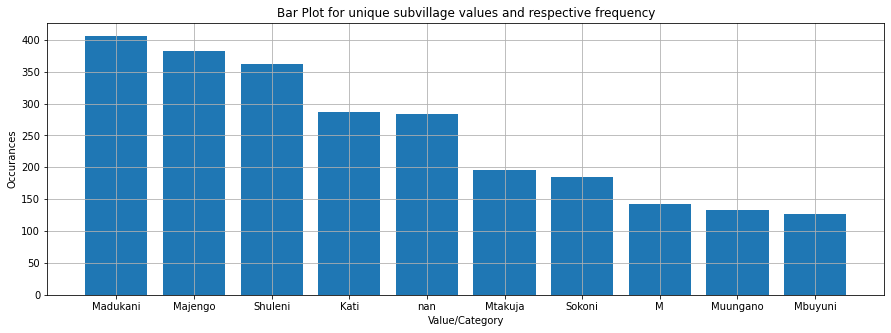


Pie Charts for most occuring categories and their status_group



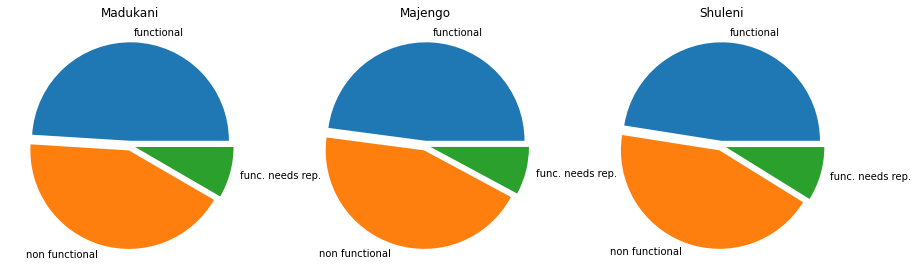

In [38]:
analyze_categorical("subvillage")

In [39]:
x1,x2,x3,z=process_categorical("subvillage",train,validation,test,5)

feature_names.extend(z)
processed_train=np.column_stack([processed_train,x1])
processed_validation=np.column_stack([processed_validation,x2])
processed_test=np.column_stack([processed_test,x3])

processed_train.shape,processed_validation.shape,processed_test.shape

((44550, 2468), (14850, 2468), (14850, 2468))

## Region

There exist a total of 21 unique values of ' region '

Out of these 21 unique values/categories,
     50 percentile or 10 values/categories occur less than or equal to 1969  times in the whole dataset.
     75 percentile or 15 values/categories occur less than or equal to 2524  times in the whole dataset.
     95 percentile or 19 values/categories occur less than or equal to 3721  times in the whole dataset.

The most common value/categories are:
1 )  Iringa with  4006 occurances.
2 )  Shinyanga with  3721 occurances.
3 )  Mbeya with  3470 occurances.


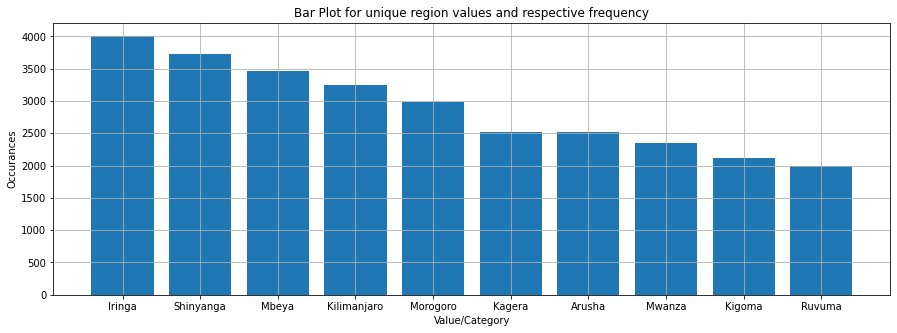


Pie Charts for most occuring categories and their status_group



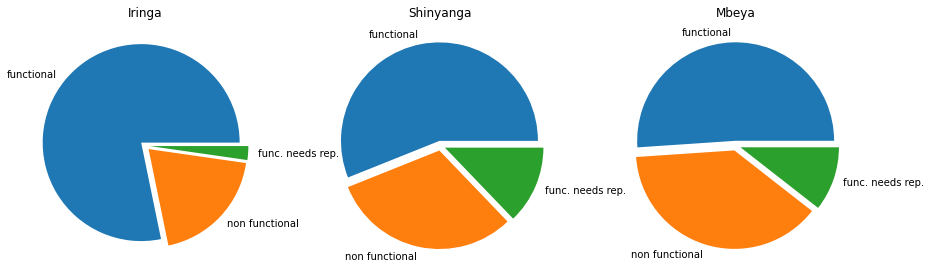

In [40]:
analyze_categorical("region")

In [41]:
x1,x2,x3,z=process_categorical("basin",train,validation,test,1)

feature_names.extend(z)
processed_train=np.column_stack([processed_train,x1])
processed_validation=np.column_stack([processed_validation,x2])
processed_test=np.column_stack([processed_test,x3])

processed_train.shape,processed_validation.shape,processed_test.shape

((44550, 2477), (14850, 2477), (14850, 2477))

# LGA

There exist a total of 124 unique values of ' lga '

Out of these 124 unique values/categories,
     50 percentile or 62 values/categories occur less than or equal to 301  times in the whole dataset.
     75 percentile or 93 values/categories occur less than or equal to 486  times in the whole dataset.
     95 percentile or 117 values/categories occur less than or equal to 775  times in the whole dataset.

The most common value/categories are:
1 )  Njombe with  1869 occurances.
2 )  Arusha Rural with  926 occurances.
3 )  Moshi Rural with  922 occurances.


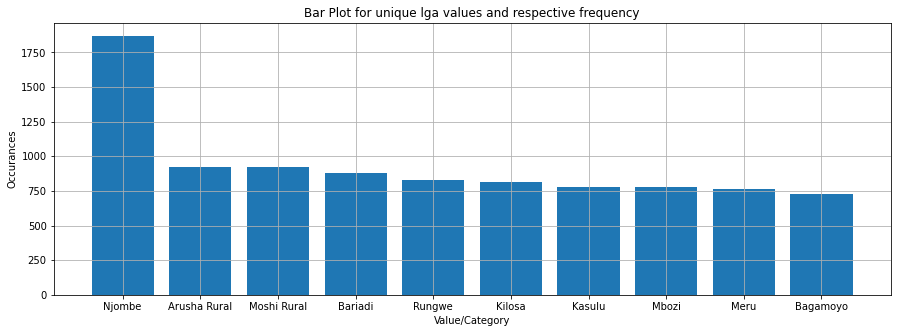


Pie Charts for most occuring categories and their status_group



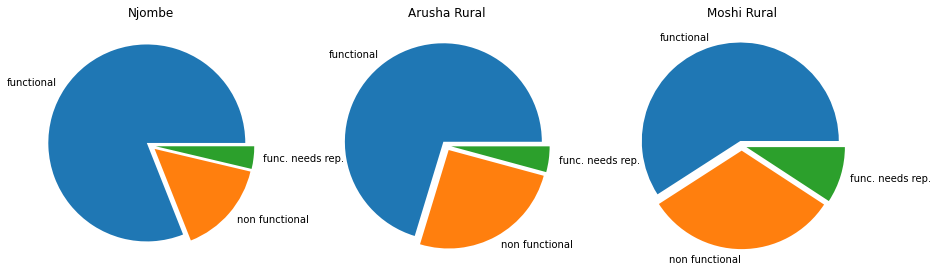

In [42]:
analyze_categorical("lga")

In [43]:
x1,x2,x3,z=process_categorical("lga",train,validation,test,1)

feature_names.extend(z)
processed_train=np.column_stack([processed_train,x1])
processed_validation=np.column_stack([processed_validation,x2])
processed_test=np.column_stack([processed_test,x3])

processed_train.shape,processed_validation.shape,processed_test.shape

((44550, 2601), (14850, 2601), (14850, 2601))

## Scheme Management

There exist a total of 13 unique values of ' scheme_management '

Out of these 13 unique values/categories,
     50 percentile or 6 values/categories occur less than or equal to 1274  times in the whole dataset.
     75 percentile or 9 values/categories occur less than or equal to 2359  times in the whole dataset.
     95 percentile or 12 values/categories occur less than or equal to 27568  times in the whole dataset.

The most common value/categories are:
1 )  VWC with  27568 occurances.
2 )  WUG with  3891 occurances.
3 )  nan with  2974 occurances.


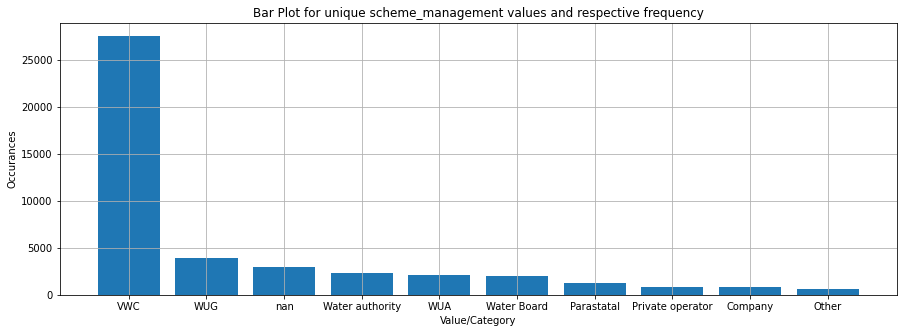


Pie Charts for most occuring categories and their status_group



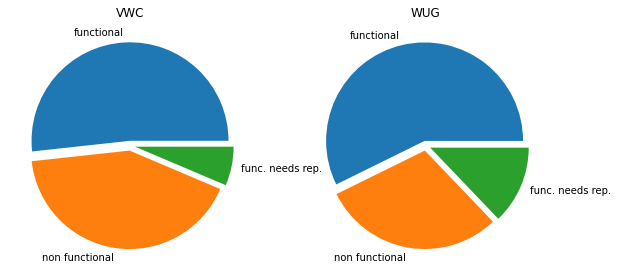

In [44]:
analyze_categorical("scheme_management")

In [45]:
x1,x2,x3,z=process_categorical("scheme_management",train,validation,test,1)

feature_names.extend(z)
processed_train=np.column_stack([processed_train,x1])
processed_validation=np.column_stack([processed_validation,x2])
processed_test=np.column_stack([processed_test,x3])

processed_train.shape,processed_validation.shape,processed_test.shape

((44550, 2614), (14850, 2614), (14850, 2614))

## Scheme Name

There exist a total of 2518 unique values of ' scheme_name '

Out of these 2518 unique values/categories,
     50 percentile or 1259 values/categories occur less than or equal to 4  times in the whole dataset.
     75 percentile or 1888 values/categories occur less than or equal to 9  times in the whole dataset.
     95 percentile or 2392 values/categories occur less than or equal to 31  times in the whole dataset.

The most common value/categories are:
1 )  nan with  21167 occurances.
2 )  K with  513 occurances.
3 )  None with  489 occurances.


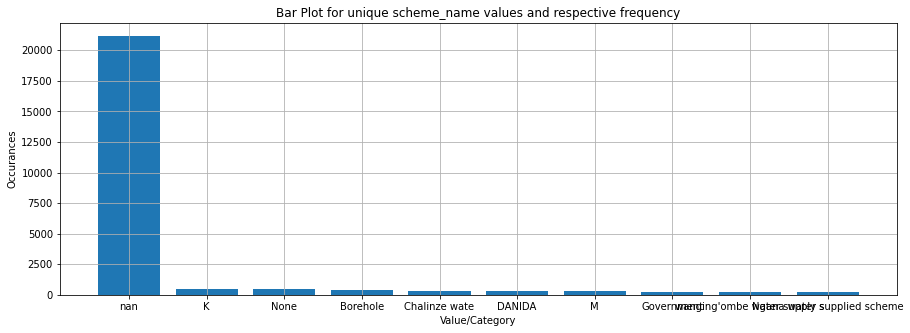


Pie Charts for most occuring categories and their status_group



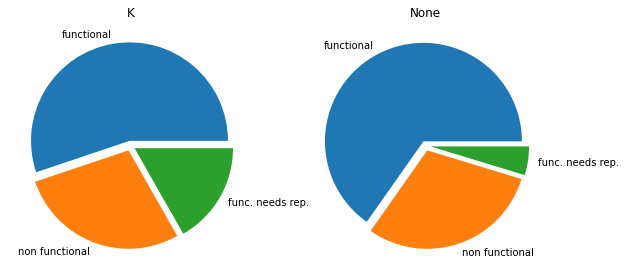

In [46]:
analyze_categorical("scheme_name")

In [47]:
x1,x2,x3,z=process_categorical("scheme_name",train,validation,test,10)

feature_names.extend(z)
processed_train=np.column_stack([processed_train,x1])
processed_validation=np.column_stack([processed_validation,x2])
processed_test=np.column_stack([processed_test,x3])

processed_train.shape,processed_validation.shape,processed_test.shape

((44550, 3223), (14850, 3223), (14850, 3223))

# Permit

In [48]:
x1,x2,x3,z=process_categorical("permit",train,validation,test,1)

feature_names.extend(z)
processed_train=np.column_stack([processed_train,x1])
processed_validation=np.column_stack([processed_validation,x2])
processed_test=np.column_stack([processed_test,x3])

processed_train.shape,processed_validation.shape,processed_test.shape

((44550, 3226), (14850, 3226), (14850, 3226))

## Extraction Type

There exist a total of 18 unique values of ' extraction_type '

Out of these 18 unique values/categories,
     50 percentile or 9 values/categories occur less than or equal to 1032  times in the whole dataset.
     75 percentile or 13 values/categories occur less than or equal to 2745  times in the whole dataset.
     95 percentile or 17 values/categories occur less than or equal to 20060  times in the whole dataset.

The most common value/categories are:
1 )  gravity with  20060 occurances.
2 )  nira/tanira with  6073 occurances.
3 )  other with  4863 occurances.


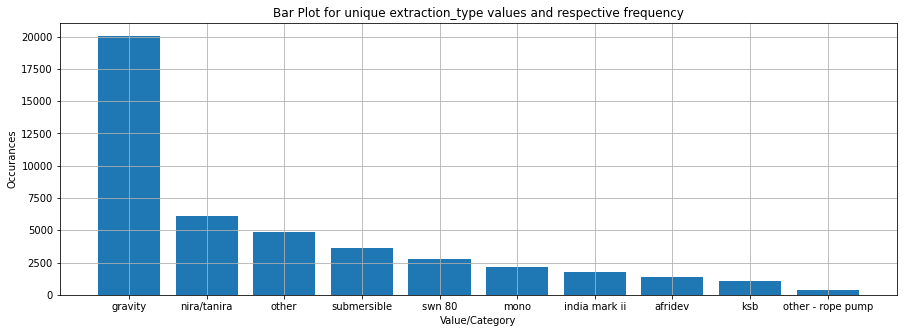


Pie Charts for most occuring categories and their status_group



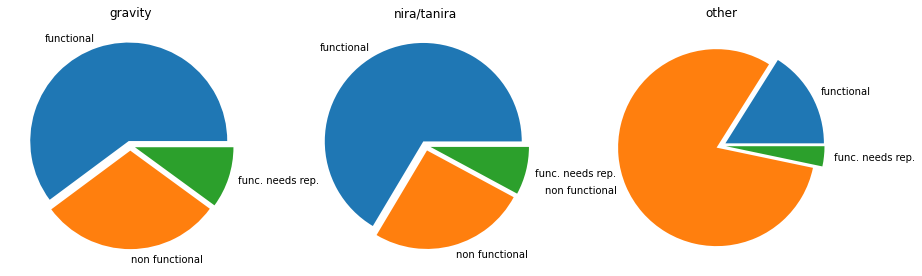

In [49]:
analyze_categorical('extraction_type')

In [50]:
x1,x2,x3,z=process_categorical("extraction_type",train,validation,test,1)

feature_names.extend(z)
processed_train=np.column_stack([processed_train,x1])
processed_validation=np.column_stack([processed_validation,x2])
processed_test=np.column_stack([processed_test,x3])

processed_train.shape,processed_validation.shape,processed_test.shape

((44550, 3244), (14850, 3244), (14850, 3244))

## Extraction Type Group 

There exist a total of 13 unique values of ' extraction_type_group '

Out of these 13 unique values/categories,
     50 percentile or 6 values/categories occur less than or equal to 1794  times in the whole dataset.
     75 percentile or 9 values/categories occur less than or equal to 4651  times in the whole dataset.
     95 percentile or 12 values/categories occur less than or equal to 20060  times in the whole dataset.

The most common value/categories are:
1 )  gravity with  20060 occurances.
2 )  nira/tanira with  6073 occurances.
3 )  other with  4863 occurances.


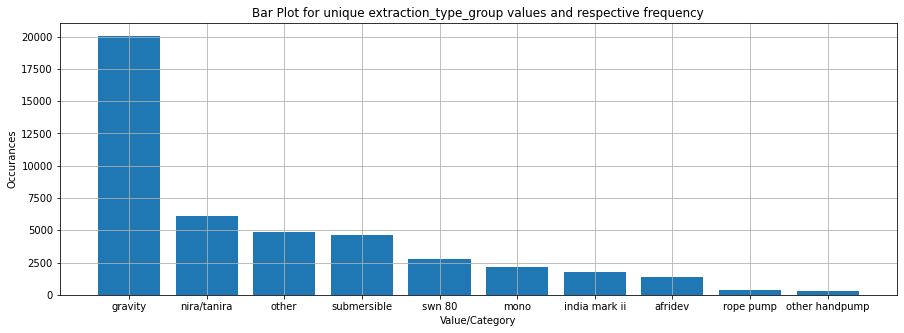


Pie Charts for most occuring categories and their status_group



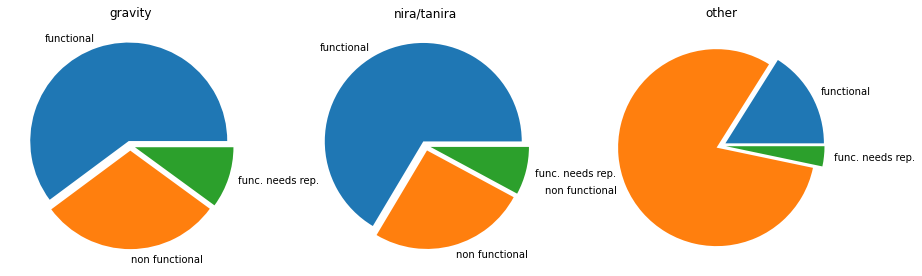

In [51]:
analyze_categorical('extraction_type_group')

#### Skipping this feature as it closely resembles "extraction_type"

## Management

There exist a total of 12 unique values of ' management '

Out of these 12 unique values/categories,
     50 percentile or 6 values/categories occur less than or equal to 1337  times in the whole dataset.
     75 percentile or 9 values/categories occur less than or equal to 2141  times in the whole dataset.
     95 percentile or 11 values/categories occur less than or equal to 30397  times in the whole dataset.

The most common value/categories are:
1 )  vwc with  30397 occurances.
2 )  wug with  4870 occurances.
3 )  water board with  2141 occurances.


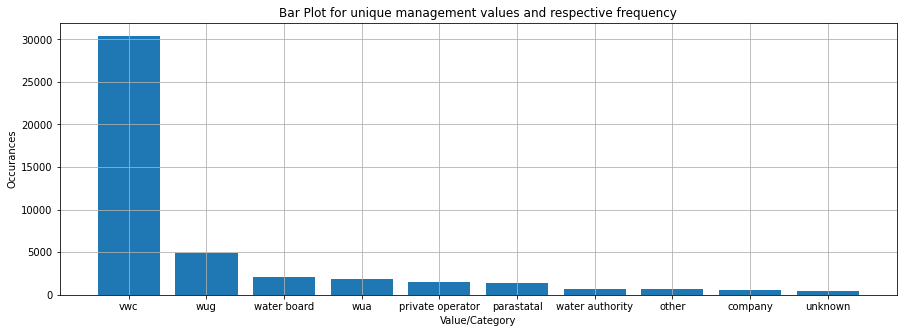


Pie Charts for most occuring categories and their status_group



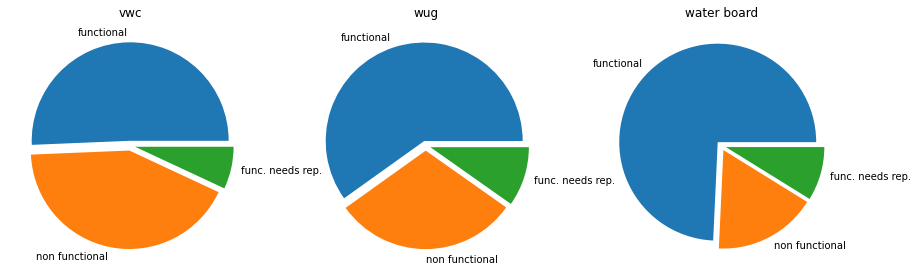

In [52]:
analyze_categorical('management')

In [53]:
x1,x2,x3,z=process_categorical("management",train,validation,test,1)

feature_names.extend(z)
processed_train=np.column_stack([processed_train,x1])
processed_validation=np.column_stack([processed_validation,x2])
processed_test=np.column_stack([processed_test,x3])

processed_train.shape,processed_validation.shape,processed_test.shape

((44550, 3256), (14850, 3256), (14850, 3256))

## Payment

There exist a total of 7 unique values of ' payment '

Out of these 7 unique values/categories,
     50 percentile or 3 values/categories occur less than or equal to 6100  times in the whole dataset.
     75 percentile or 5 values/categories occur less than or equal to 6720  times in the whole dataset.
     95 percentile or 6 values/categories occur less than or equal to 19025  times in the whole dataset.

The most common value/categories are:
1 )  never pay with  19025 occurances.
2 )  pay per bucket with  6720 occurances.
3 )  pay monthly with  6259 occurances.


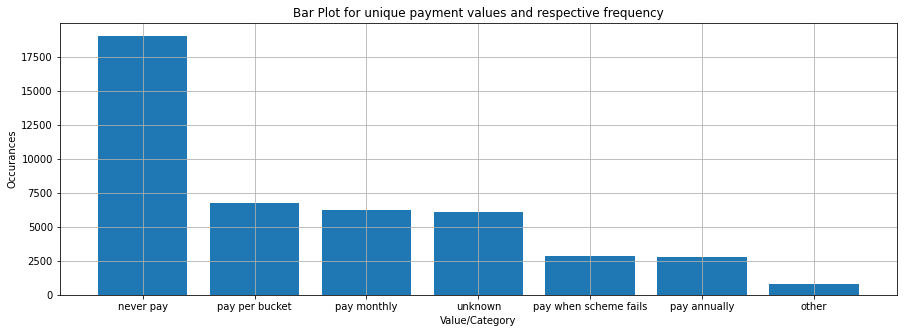


Pie Charts for most occuring categories and their status_group



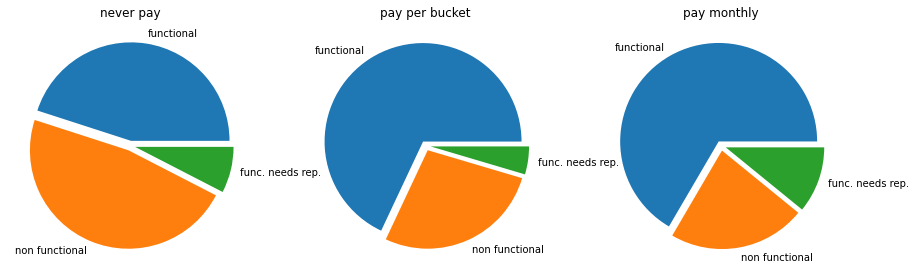

In [54]:
analyze_categorical('payment')

In [55]:
x1,x2,x3,z=process_categorical("payment",train,validation,test,1)

feature_names.extend(z)
processed_train=np.column_stack([processed_train,x1])
processed_validation=np.column_stack([processed_validation,x2])
processed_test=np.column_stack([processed_test,x3])

processed_train.shape,processed_validation.shape,processed_test.shape

((44550, 3263), (14850, 3263), (14850, 3263))

## Water Quality

There exist a total of 8 unique values of ' water_quality '

Out of these 8 unique values/categories,
     50 percentile or 4 values/categories occur less than or equal to 626  times in the whole dataset.
     75 percentile or 6 values/categories occur less than or equal to 3647  times in the whole dataset.
     95 percentile or 7 values/categories occur less than or equal to 38099  times in the whole dataset.

The most common value/categories are:
1 )  soft with  38099 occurances.
2 )  salty with  3647 occurances.
3 )  unknown with  1405 occurances.


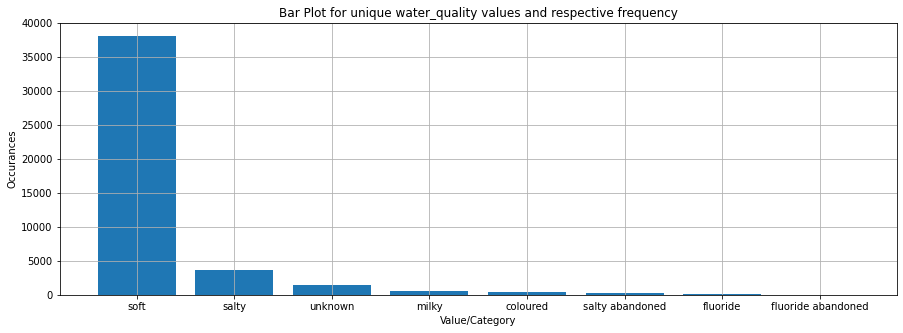


Pie Charts for most occuring categories and their status_group



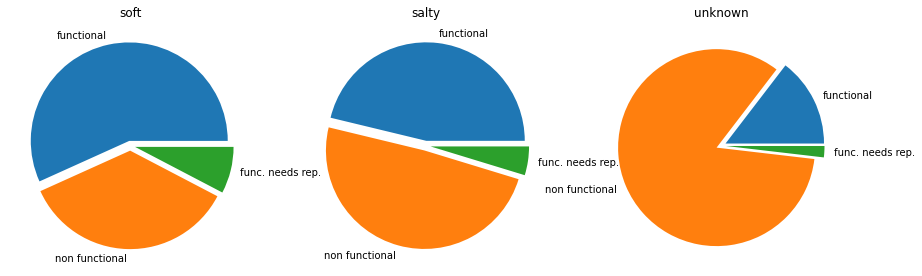

In [56]:
analyze_categorical("water_quality")

In [57]:
x1,x2,x3,z=process_categorical("scheme_management",train,validation,test,1)

feature_names.extend(z)
processed_train=np.column_stack([processed_train,x1])
processed_validation=np.column_stack([processed_validation,x2])
processed_test=np.column_stack([processed_test,x3])

processed_train.shape,processed_validation.shape,processed_test.shape

((44550, 3276), (14850, 3276), (14850, 3276))

## Source

There exist a total of 10 unique values of ' source '

Out of these 10 unique values/categories,
     50 percentile or 5 values/categories occur less than or equal to 1737  times in the whole dataset.
     75 percentile or 7 values/categories occur less than or equal to 8280  times in the whole dataset.
     95 percentile or 9 values/categories occur less than or equal to 12782  times in the whole dataset.

The most common value/categories are:
1 )  spring with  12782 occurances.
2 )  shallow well with  12647 occurances.
3 )  machine dbh with  8280 occurances.


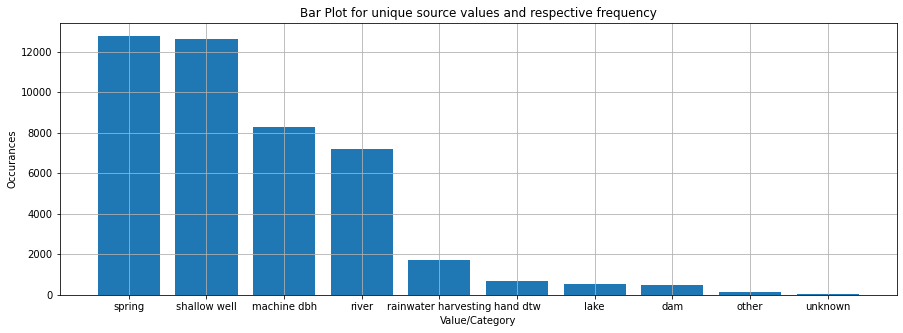


Pie Charts for most occuring categories and their status_group



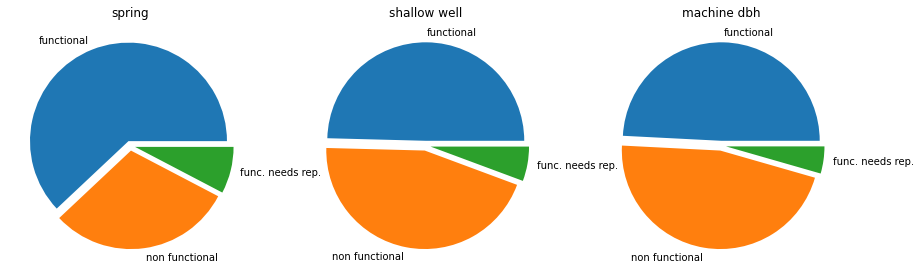

In [58]:
analyze_categorical("source")

In [59]:
x1,x2,x3,z=process_categorical("source",train,validation,test,1)

feature_names.extend(z)
processed_train=np.column_stack([processed_train,x1])
processed_validation=np.column_stack([processed_validation,x2])
processed_test=np.column_stack([processed_test,x3])

processed_train.shape,processed_validation.shape,processed_test.shape

((44550, 3286), (14850, 3286), (14850, 3286))

# Quantity

There exist a total of 5 unique values of ' quantity '

Out of these 5 unique values/categories,
     50 percentile or 2 values/categories occur less than or equal to 4655  times in the whole dataset.
     75 percentile or 3 values/categories occur less than or equal to 11242  times in the whole dataset.
     95 percentile or 4 values/categories occur less than or equal to 24983  times in the whole dataset.

The most common value/categories are:
1 )  enough with  24983 occurances.
2 )  insufficient with  11242 occurances.
3 )  dry with  4655 occurances.


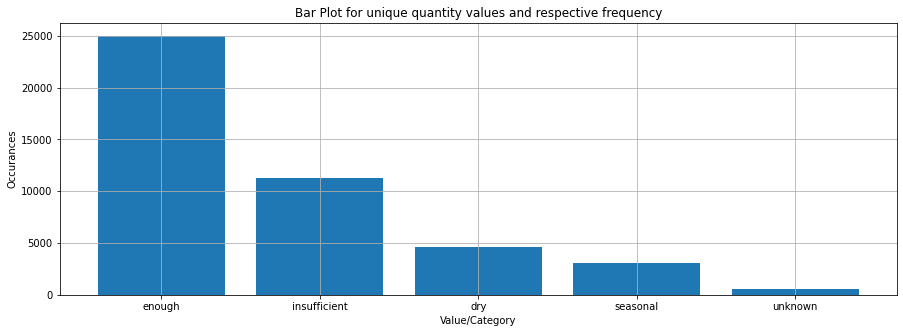


Pie Charts for most occuring categories and their status_group



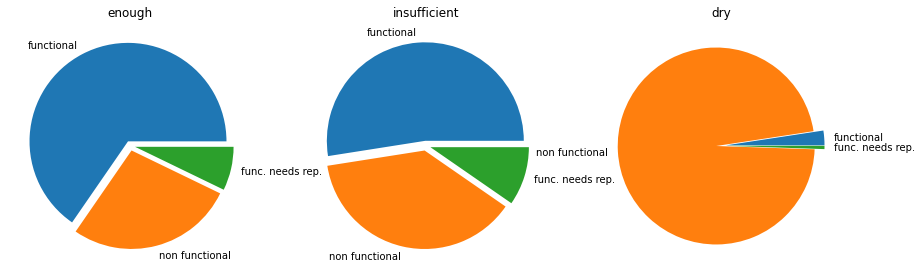

In [60]:
analyze_categorical("quantity")

In [61]:
x1,x2,x3,z=process_categorical("quantity",train,validation,test,1)

feature_names.extend(z)
processed_train=np.column_stack([processed_train,x1])
processed_validation=np.column_stack([processed_validation,x2])
processed_test=np.column_stack([processed_test,x3])

processed_train.shape,processed_validation.shape,processed_test.shape

((44550, 3291), (14850, 3291), (14850, 3291))

#### *Dry water quantity is significantly non-functional

## Waterpoint_type

There exist a total of 7 unique values of ' waterpoint_type '

Out of these 7 unique values/categories,
     50 percentile or 3 values/categories occur less than or equal to 4549  times in the whole dataset.
     75 percentile or 5 values/categories occur less than or equal to 13116  times in the whole dataset.
     95 percentile or 6 values/categories occur less than or equal to 21358  times in the whole dataset.

The most common value/categories are:
1 )  communal standpipe with  21358 occurances.
2 )  hand pump with  13116 occurances.
3 )  other with  4840 occurances.


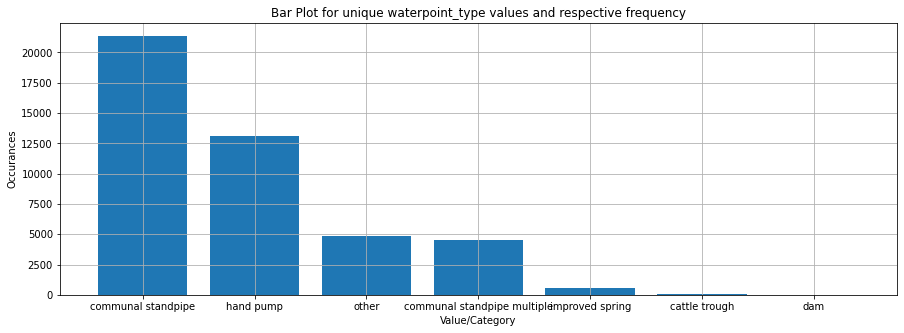


Pie Charts for most occuring categories and their status_group



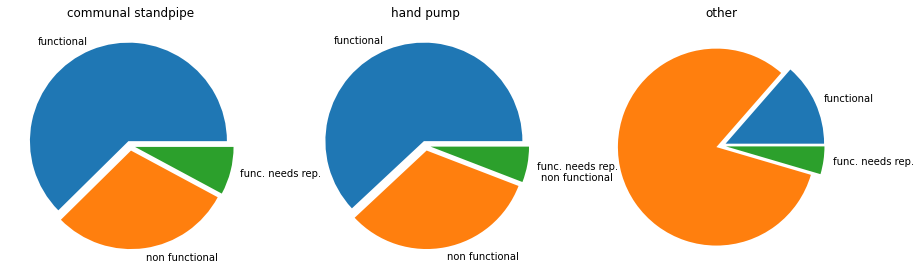

In [62]:
analyze_categorical("waterpoint_type")

In [63]:
x1,x2,x3,z=process_categorical("waterpoint_type",train,validation,test,1)

feature_names.extend(z)
processed_train=np.column_stack([processed_train,x1])
processed_validation=np.column_stack([processed_validation,x2])
processed_test=np.column_stack([processed_test,x3])

processed_train.shape,processed_validation.shape,processed_test.shape

((44550, 3298), (14850, 3298), (14850, 3298))

## Waterpoint name

There exist a total of 29027 unique values of ' wpt_name '

Out of these 29027 unique values/categories,
     50 percentile or 14513 values/categories occur less than or equal to 1  times in the whole dataset.
     75 percentile or 21770 values/categories occur less than or equal to 1  times in the whole dataset.
     95 percentile or 27575 values/categories occur less than or equal to 2  times in the whole dataset.

The most common value/categories are:
1 )  none with  2733 occurances.
2 )  Shuleni with  1325 occurances.
3 )  Zahanati with  630 occurances.


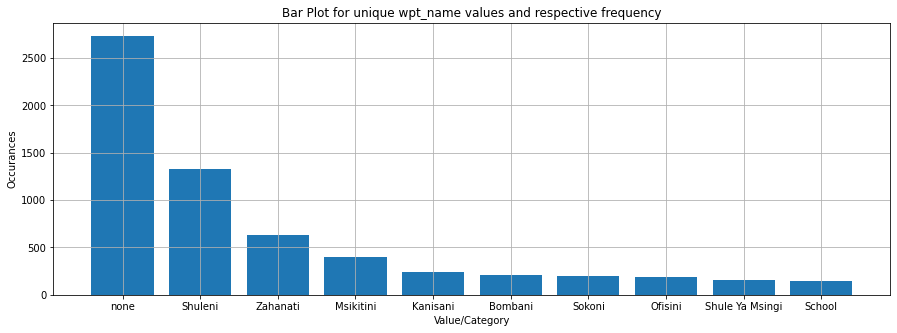


Pie Charts for most occuring categories and their status_group



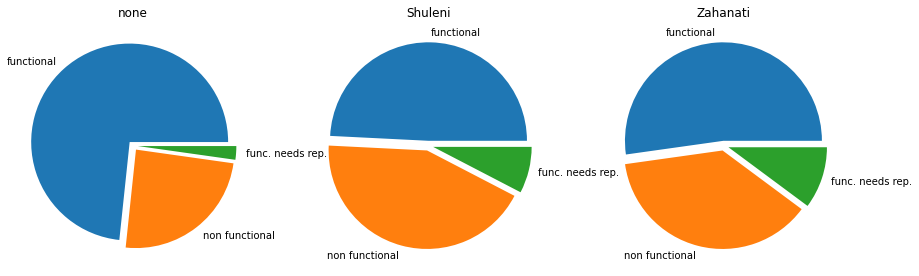

In [64]:
analyze_categorical("wpt_name")

In [65]:
x1,x2,x3,z=process_categorical("waterpoint_type",train,validation,test,10)

feature_names.extend(z)
processed_train=np.column_stack([processed_train,x1])
processed_validation=np.column_stack([processed_validation,x2])
processed_test=np.column_stack([processed_test,x3])

processed_train.shape,processed_validation.shape,processed_test.shape

((44550, 3305), (14850, 3305), (14850, 3305))

In [66]:
len(feature_names)

3305

# Base Model

In [67]:
from xgboost import XGBClassifier

In [68]:
x_cfl=XGBClassifier(verbosity=1)
x_cfl.fit(processed_train,train["status_group"])

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:30:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=1)

# Validation Accuracy Score

#1 Accuracy Score in leaderboard is 0.82 

In [70]:
sklearn.metrics.accuracy_score(validation["status_group"],x_cfl.predict(processed_validation))

0.7826262626262627

# Train Accuracy Score

In [71]:
sklearn.metrics.accuracy_score(train["status_group"],x_cfl.predict(processed_train))

0.8097643097643098

Further Approach:
- Grouping Feature using K-Means clustering on longitude and latitude values
- Hyperparameter tuning
- More feature engineering using "feature-group" or "feature-class" values which have been ignored for now